# LTC Credit Card Fraud Analysis

## Importing Libraries

In [70]:
%%capture
!pip install pandas 
!pip install numpy
!pip install matplotlib, seaborn

## Importing Libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Importing Dataset

In [47]:
data = pd.read_csv('../data/BankChurners.csv')
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


## Data Preprocessing

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [26]:
data.isna().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [27]:
data.dropna(inplace=True)
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [28]:
# drop client number
data.drop('CLIENTNUM', axis=1, inplace=True)

In [29]:
# drop last two columns as they are not useful for descriptive analysis
data.drop(data.columns[-2:], axis=1, inplace=True)

In [30]:
# Extract columns
columns = data.columns
numerical = data._get_numeric_data().columns
categorical = list(set(columns) - set(numerical))
numerical = list(numerical)
print('Numerical Columns: ', numerical)
print('Categorical Columns: ', categorical)

Numerical Columns:  ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
Categorical Columns:  ['Income_Category', 'Marital_Status', 'Education_Level', 'Attrition_Flag', 'Card_Category', 'Gender']


In [31]:
# describe the data the numerical data 
data[numerical].describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


C:\Users\michael\AppData\Local\Temp\ipykernel_13988\4177373585.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col]);


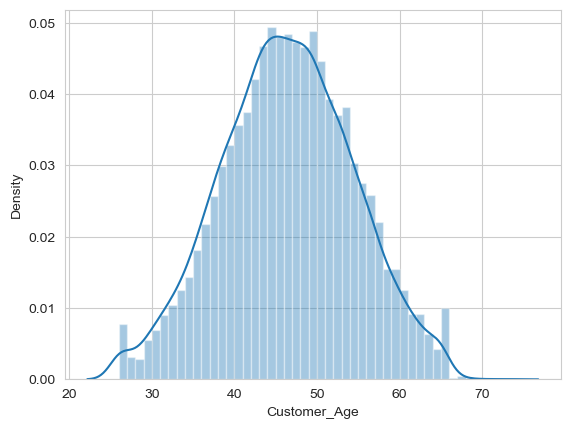

C:\Users\michael\AppData\Local\Temp\ipykernel_13988\4177373585.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col]);


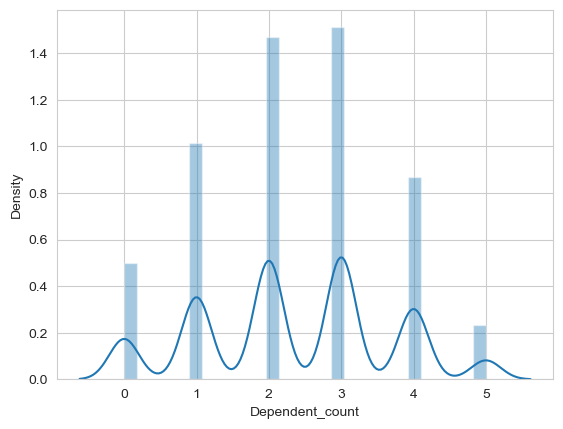

C:\Users\michael\AppData\Local\Temp\ipykernel_13988\4177373585.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col]);


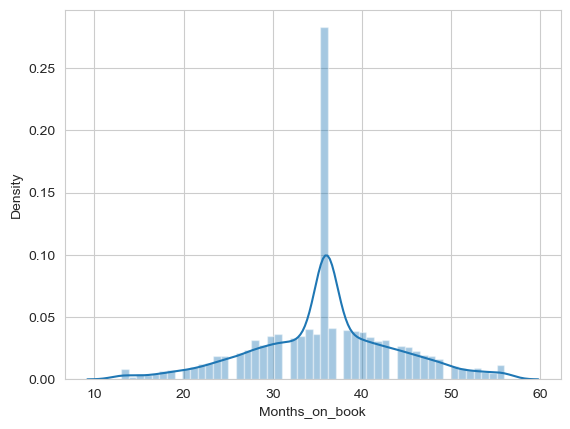

C:\Users\michael\AppData\Local\Temp\ipykernel_13988\4177373585.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col]);


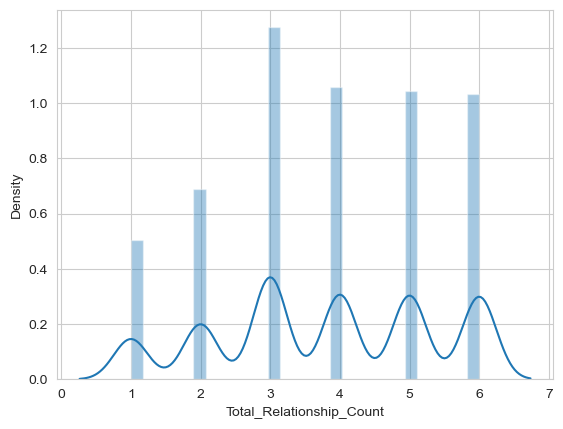

C:\Users\michael\AppData\Local\Temp\ipykernel_13988\4177373585.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col]);


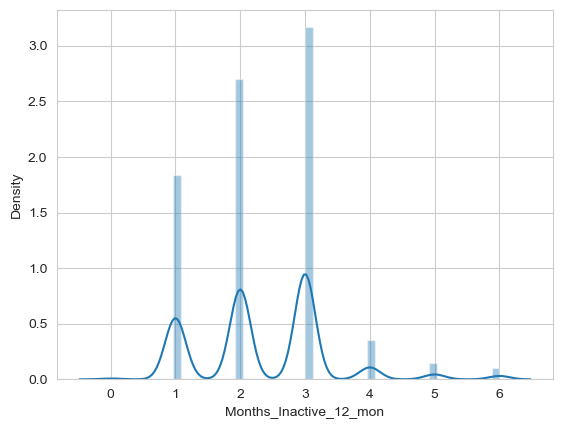

C:\Users\michael\AppData\Local\Temp\ipykernel_13988\4177373585.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col]);


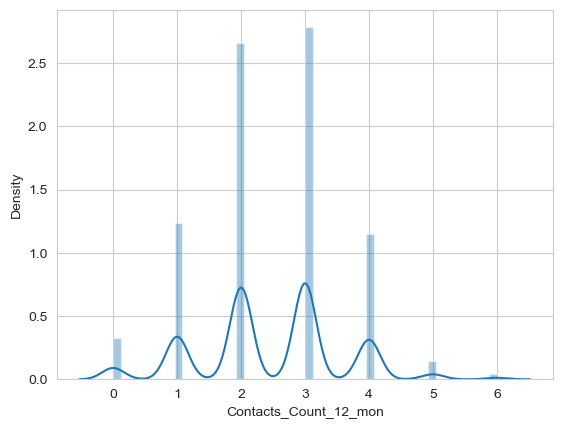

C:\Users\michael\AppData\Local\Temp\ipykernel_13988\4177373585.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col]);


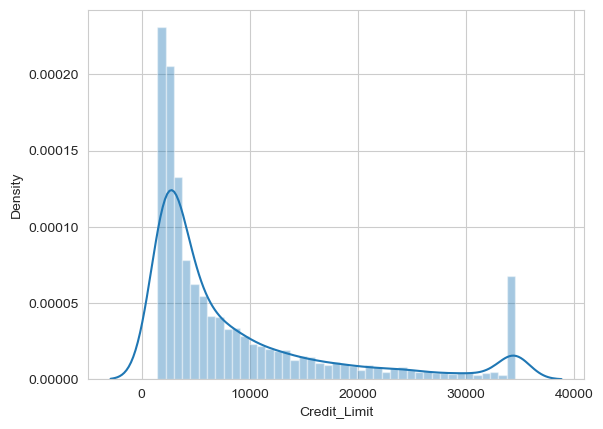

C:\Users\michael\AppData\Local\Temp\ipykernel_13988\4177373585.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col]);


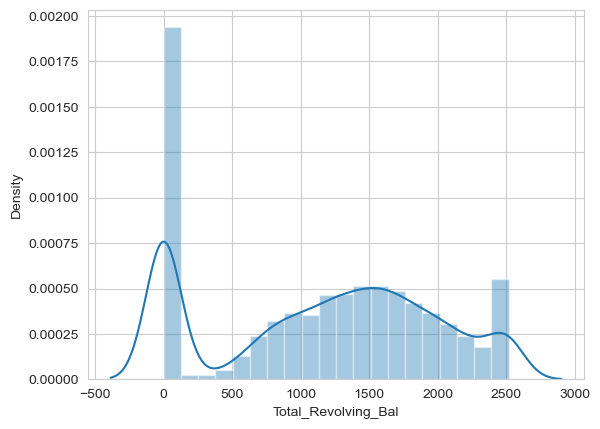

C:\Users\michael\AppData\Local\Temp\ipykernel_13988\4177373585.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col]);


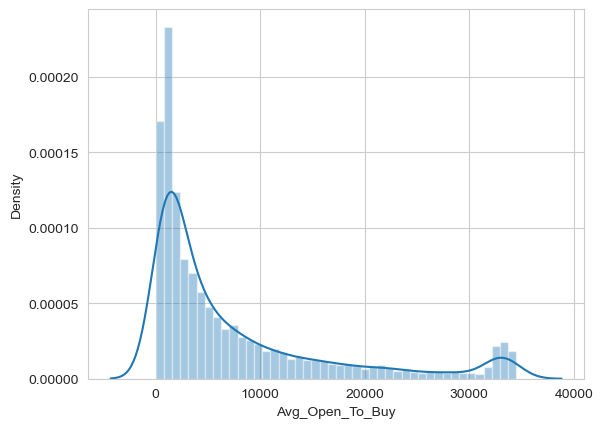

C:\Users\michael\AppData\Local\Temp\ipykernel_13988\4177373585.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col]);


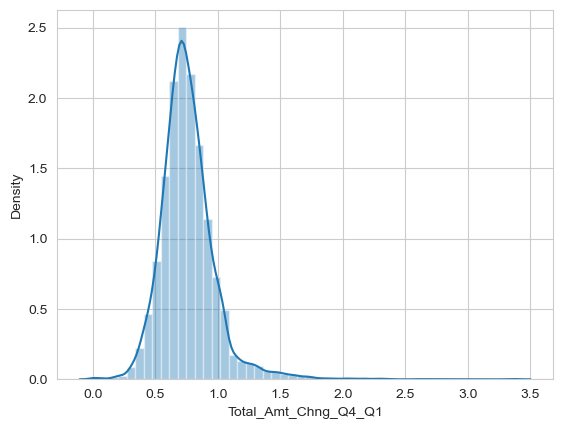

C:\Users\michael\AppData\Local\Temp\ipykernel_13988\4177373585.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col]);


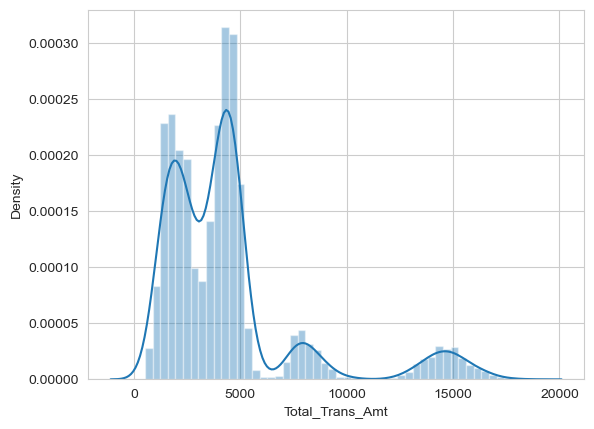

C:\Users\michael\AppData\Local\Temp\ipykernel_13988\4177373585.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col]);


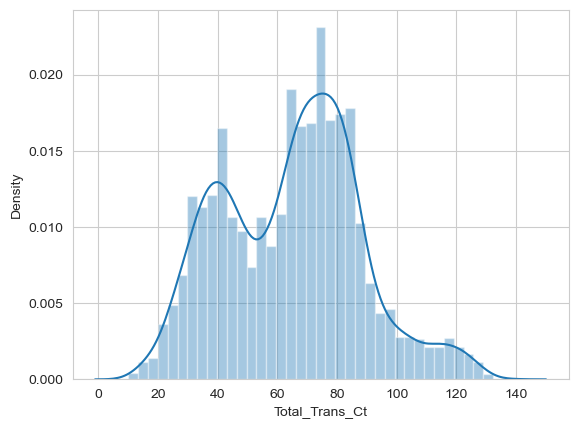

C:\Users\michael\AppData\Local\Temp\ipykernel_13988\4177373585.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col]);


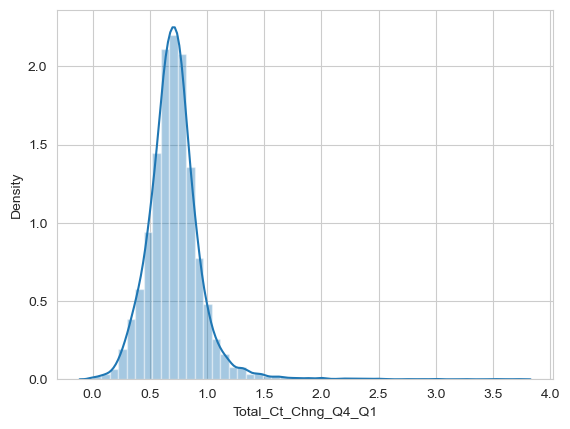

C:\Users\michael\AppData\Local\Temp\ipykernel_13988\4177373585.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col]);


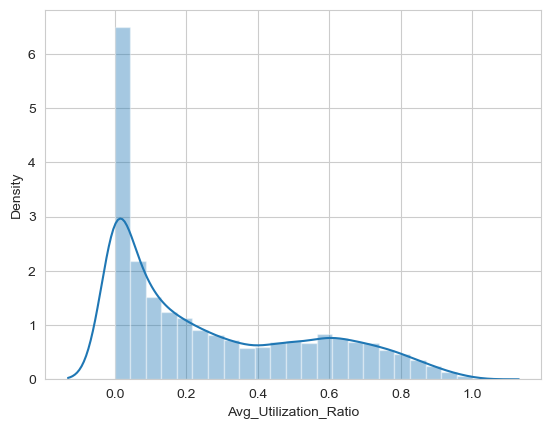

In [38]:
# plot histogram for numerical data to see the distribution and superimpose normal distribution
for col in numerical:
    sns.distplot(data[col]);
    plt.show()

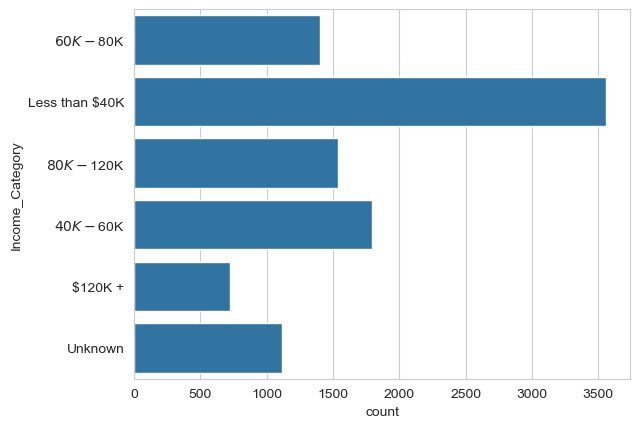

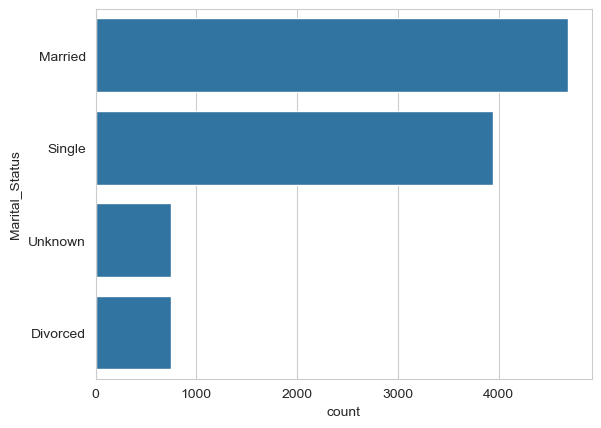

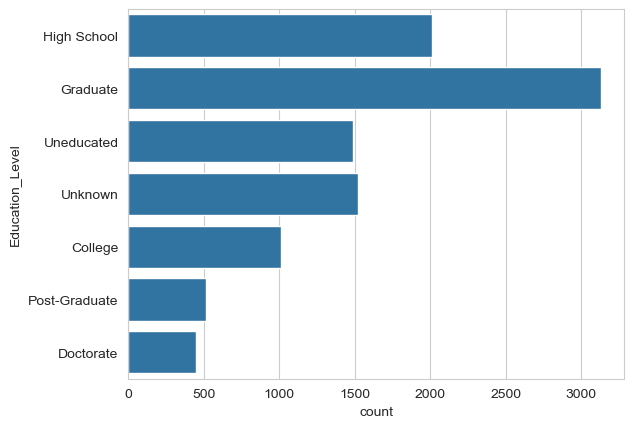

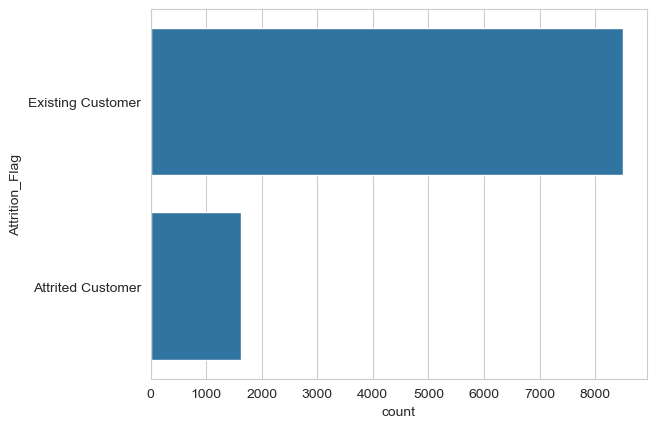

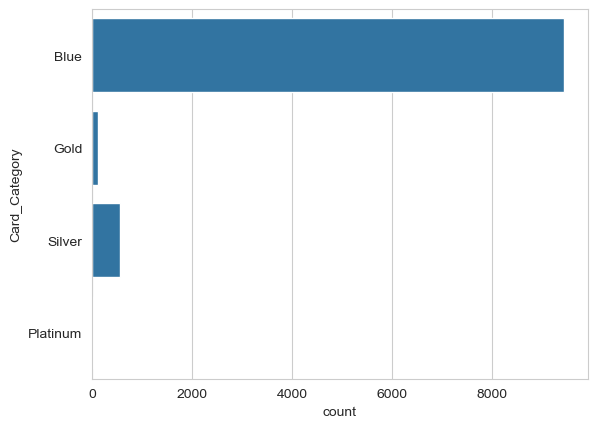

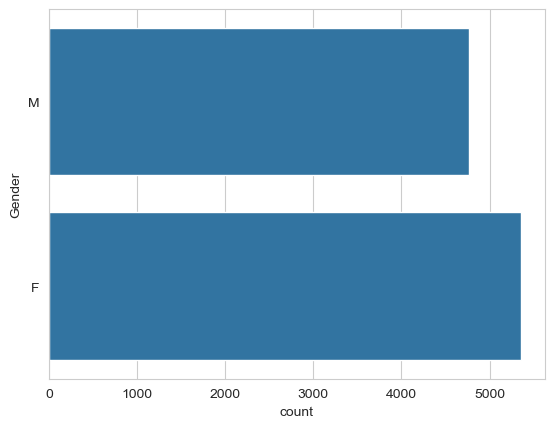

In [32]:
# describe the data the categorical data and get value counts plot bar plot
for col in categorical:
    sns.countplot(y=col, data=data, color=sns.color_palette()[0])
    plt.show()


## Credit Fraud Analysis

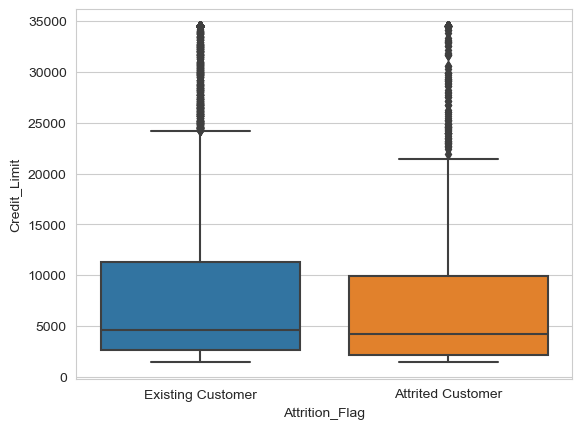

In [39]:
# credit limit vs attrition
sns.boxplot(x='Attrition_Flag', y='Credit_Limit', data=data)
plt.show()


In [40]:
# credit limit vs attrition
data.groupby('Attrition_Flag')['Credit_Limit'].describe()


,count,mean,std,min,25%,50%,75%,max
Attrition_Flag,,,,,,,,
Attrited Customer,1627.0,8136.039459,9095.334105,1438.3,2114.0,4178.0,9933.50,34516.0
Existing Customer,8500.0,8726.877518,9084.969807,1438.3,2602.0,4643.5,11252.75,34516.0


In [41]:
# credit limit vs income category
data.groupby('Income_Category')['Credit_Limit'].describe()


,count,mean,std,min,25%,50%,75%,max
Income_Category,,,,,,,,
$120K +,727.0,19717.322558,12064.309210,1438.3,8466.50,18442.0,34516.00,34516.0
$40K - $60K,1790.0,5462.259832,4557.471801,1438.3,2435.50,3682.0,6725.00,23981.0
$60K - $80K,1402.0,10758.772967,8862.475017,1438.3,3661.25,7660.0,15220.50,34516.0
$80K - $120K,1535.0,15809.890945,11259.665550,1438.3,5511.00,12830.0,25182.50,34516.0
Less than $40K,3561.0,3754.404521,2759.888288,1438.3,2021.00,2766.0,4271.00,15987.0
Unknown,1112.0,9516.582464,8677.921738,1438.3,3137.00,6380.0,12420.25,34516.0


<Axes: xlabel='Credit_Limit', ylabel='Income_Category'>

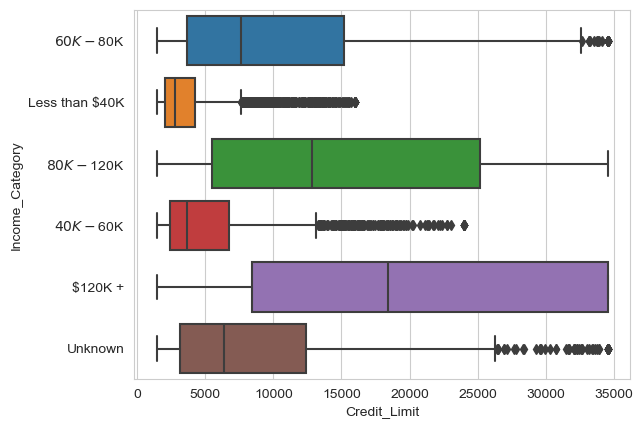

In [43]:
# credit limit vs income category boxplot
sns.boxplot(y='Income_Category', x='Credit_Limit', data=data)

In [48]:
# credit limit vs card category
data.groupby('Card_Category')['Credit_Limit'].describe()


,count,mean,std,min,25%,50%,75%,max
Card_Category,,,,,,,,
Blue,9436.0,7363.780002,7644.249219,1438.3,2476.00,4105.0,9070.0,34516.0
Gold,116.0,28416.370690,8673.910045,3735.0,22724.25,34516.0,34516.0,34516.0
Platinum,20.0,30283.450000,7698.229458,15987.0,31882.25,34516.0,34516.0,34516.0
Silver,555.0,25277.836036,9652.816062,3735.0,15153.00,29808.0,34516.0,34516.0


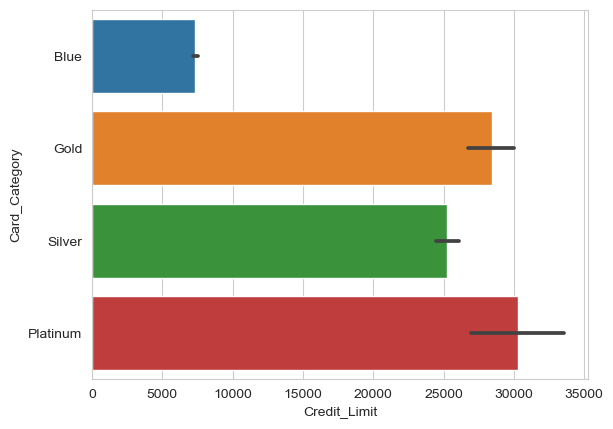

In [49]:
# credit limit vs card category barplot
sns.barplot(y='Card_Category', x='Credit_Limit', data=data)
plt.show()

In [50]:
# revisiting the data
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


<Axes: xlabel='Total_Revolving_Bal', ylabel='Card_Category'>

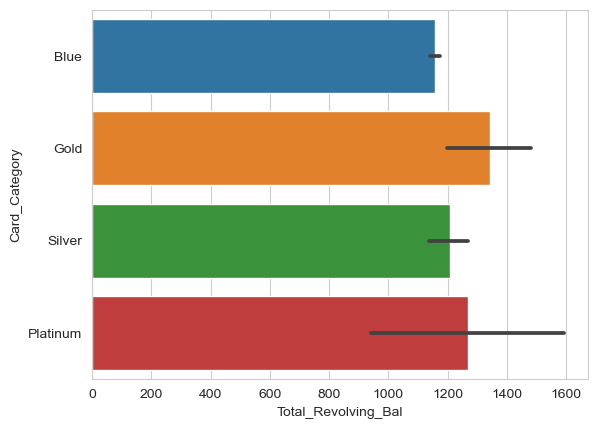

In [54]:
# card category  vs total revolve balance
sns.barplot(y='Card_Category', x='Total_Revolving_Bal', data=data)


In [55]:
# check whether the total transaction amount is greater than the credit limit
fraud = data[data['Total_Trans_Amt'] > data['Credit_Limit']]
fraud.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
108,808284783,Existing Customer,62,F,1,Unknown,Married,Less than $40K,Blue,56,...,1438.3,0,1438.3,0.813,1951,44,1.095,0.000,0.000008,0.99999
169,709531908,Existing Customer,53,M,3,High School,Married,$60K - $80K,Blue,47,...,1438.3,0,1438.3,0.776,2184,53,0.828,0.000,0.000115,0.99989
226,769425858,Existing Customer,45,M,3,College,Single,$60K - $80K,Blue,32,...,1438.3,0,1438.3,0.810,1468,26,0.625,0.000,0.000056,0.99994
354,781391058,Existing Customer,55,M,1,Uneducated,Single,$40K - $60K,Blue,49,...,1443.0,1375,68.0,0.683,1991,38,0.583,0.953,0.000174,0.99983
360,711643458,Existing Customer,50,F,1,Uneducated,Married,Less than $40K,Blue,43,...,1438.3,0,1438.3,1.068,1439,41,1.050,0.000,0.000498,0.99950


In [68]:
# check the number of frauds
fraud.shape
fraud.shape[0]/data.shape[0] * 100

40.150093808630395

In [57]:
# check the number of frauds
fraud['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    3532
Attrited Customer     534
Name: count, dtype: int64

In [58]:
# check the number of frauds
fraud['Card_Category'].value_counts()


Card_Category
Blue      4028
Silver      33
Gold         5
Name: count, dtype: int64

In [59]:
# check the number of frauds
fraud['Income_Category'].value_counts()

Income_Category
Less than $40K    2247
$40K - $60K        838
Unknown            338
$60K - $80K        328
$80K - $120K       236
$120K +             79
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Income_Category'>

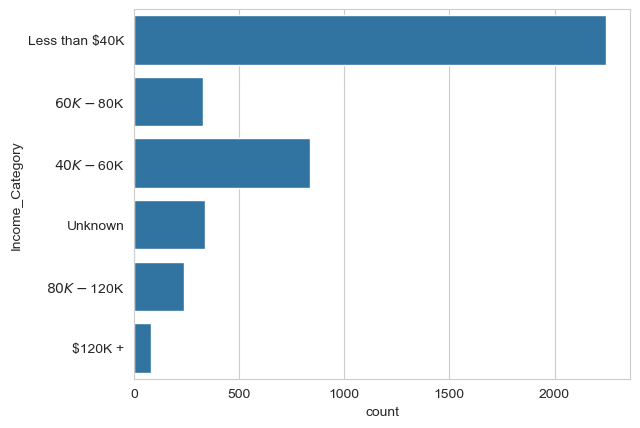

In [64]:
# check the number of frauds plot the pie chart
sns.countplot(y='Income_Category', data=fraud, color=sns.color_palette()[0])

In [65]:
# check the number of frauds
fraud['Education_Level'].value_counts()

Education_Level
Graduate         1220
High School       800
Unknown           636
Uneducated        597
College           409
Post-Graduate     211
Doctorate         193
Name: count, dtype: int64

In [66]:
# check the number of frauds
fraud['Marital_Status'].value_counts()

Marital_Status
Married     1773
Single      1686
Unknown      317
Divorced     290
Name: count, dtype: int64

In [ ]:
# check the number of frauds
